In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [3]:
observations_df= pd.read_csv('observations.csv')
species_df= pd.read_csv('species_info.csv')

In [4]:
observations_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
species_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [6]:
#Analisis Inicial

print('Información General de observations_df:\n')
print(observations_df.info(),'\n')
print(observations_df.describe(),'\n')
print(observations_df.shape,'\n')

print('Información General de species_df:\n')
print(species_df.info(),'\n')
print(species_df.describe(),'\n')
print(species_df.shape,'\n')

print(species_df['conservation_status'].unique())


Información General de observations_df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None 

       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000 

(23296, 3) 

Información General de species_df:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non

In [7]:
print('Hubo un total de', observations_df['observations'].sum(),\
       'observaciones entre todos los parques nacionales')

Hubo un total de 3314739 observaciones entre todos los parques nacionales


Las observaciones por categoría se dieron de la siguiente forma: 


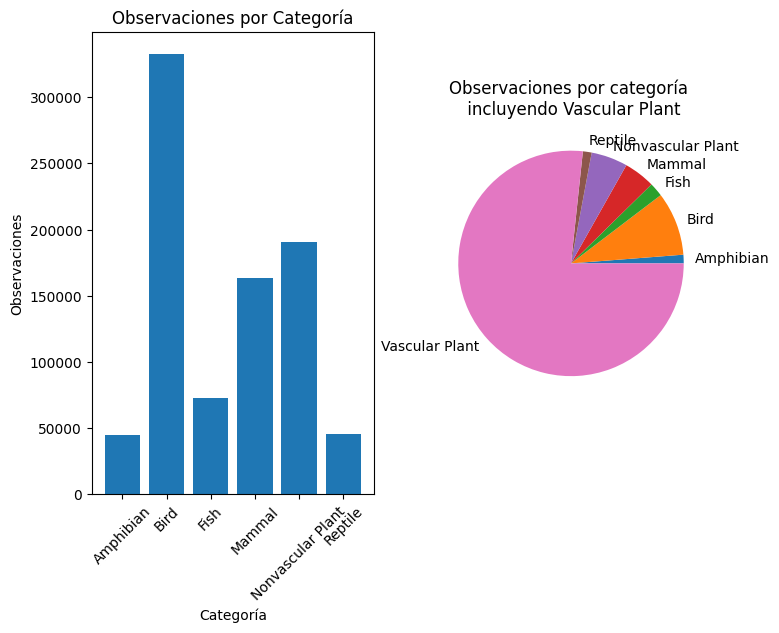

In [8]:
obs_species_df=pd.merge(observations_df,species_df,how='inner')
print('Las observaciones por categoría se dieron de la siguiente forma: ')
obsxcategory=obs_species_df.groupby('category').observations.sum().reset_index()
category=[]
observations=[]
for i,u in zip(obsxcategory['category'],obsxcategory['observations']):
    if i=='Vascular Plant':
        break
    else:
        category.append(i)
        observations.append(u)

fig=plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,2,1)
ax.bar(category,observations)
ax.set(title='Observaciones por Categoría',xlabel='Categoría',\
       ylabel='Observaciones')
ax.tick_params(axis='x',labelsize=10,rotation=45)

category.append(obsxcategory['category'][6])
observations.append(obsxcategory['observations'][6])

ax = fig.add_subplot(1,2,2)
ax.pie(observations,labels=category)
ax.set(title="Observaciones por categoría \n incluyendo Vascular Plant")

plt.show()


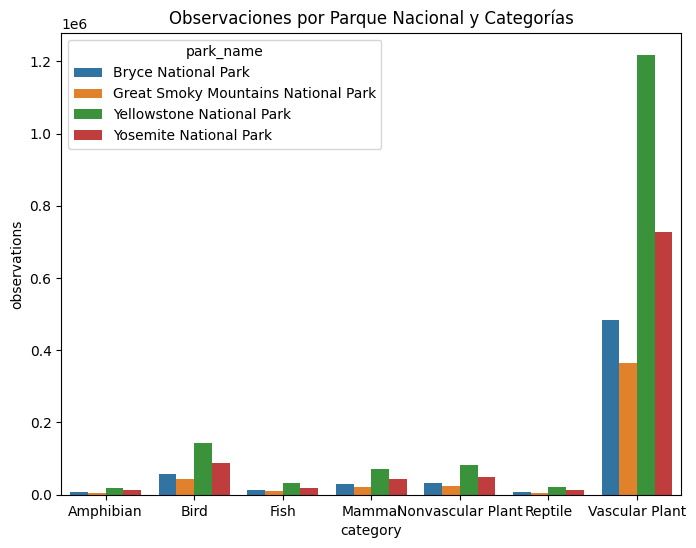

<Figure size 640x480 with 0 Axes>

In [9]:
obsxcategoryxpark=obs_species_df.groupby(['category','park_name'])['observations'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=obsxcategoryxpark, x='category', y='observations', hue='park_name')
ax=plt.subplot()
ax.set(title='Observaciones por Parque Nacional y Categorías')
plt.show()
plt.clf()

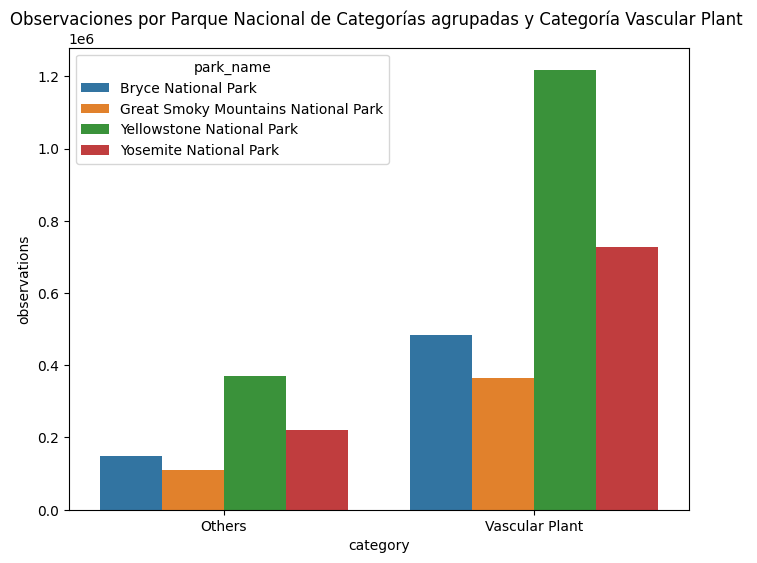

<Figure size 640x480 with 0 Axes>

In [25]:
groupedxvp=obsxcategoryxpark[obsxcategoryxpark['category']==\
                                  'Vascular Plant'].groupby('park_name').observations.\
                                    sum().reset_index()

groupedxothers=obsxcategoryxpark[obsxcategoryxpark['category']!=\
                                 'Vascular Plant'].groupby('park_name').observations.\
                                    sum().reset_index()

groupedxvp['category']='Vascular Plant'
groupedxothers['category']='Others'

obsxcategoryxpark2=pd.concat([groupedxothers,groupedxvp])
obsxcategoryxpark2

plt.figure(figsize=(8, 6))
sns.barplot(data=obsxcategoryxpark2, x='category', y='observations', hue='park_name')
ax=plt.subplot()
ax.set(title='Observaciones por Parque Nacional de Categorías agrupadas y Categoría Vascular Plant ')
plt.show()
plt.clf()


In [11]:
#Número de observaciones de cada categoría por parque nacional
obsxcategoryxpark_pivot=obsxcategoryxpark.pivot(columns='park_name',\
                                                index='category',values='observations')
obsxcategoryxpark_pivot

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park
category,,,,
Amphibian,7542,5876,19937,11713
Bird,58590,42869,144300,86612
Fish,12823,9482,31459,19137
Mammal,28830,21056,70701,42533
Nonvascular Plant,32992,24857,83021,49783
Reptile,8141,5841,20061,11779
Vascular Plant,484373,364882,1218162,727895


<Figure size 1000x800 with 0 Axes>

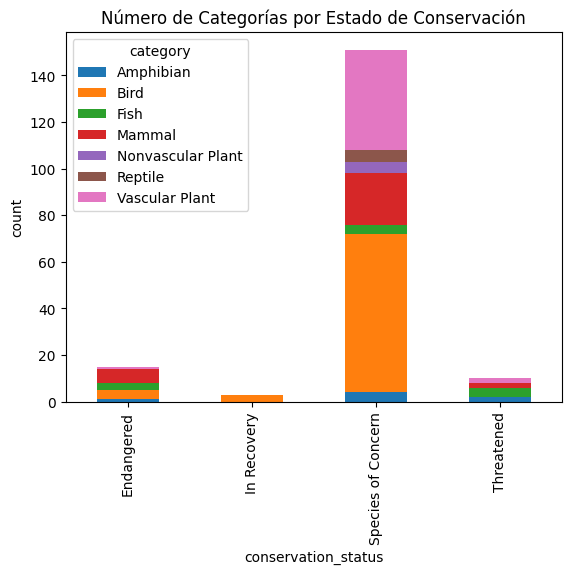

<Figure size 640x480 with 0 Axes>

In [12]:
species_df['conservation_status']= species_df['conservation_status'].fillna('Not at Risk')

categoryxcstatus=species_df[species_df['conservation_status']!='Not at Risk'].drop_duplicates('scientific_name').\
    groupby(['category','conservation_status']).\
        conservation_status.size().reset_index(name='count')
categoryxcstatus_pivot=categoryxcstatus.pivot(columns='category',index='conservation_status',values='count')

fig=plt.figure(figsize=(10,8))
categoryxcstatus_pivot.plot(kind='bar',stacked=True)
ax=plt.subplot()
ax.set(title='Número de Categorías por Estado de Conservación',ylabel='count')
plt.show()
plt.show()
plt.clf()

In [13]:
#Organización de los datos para análisis de Correlación
categoryxcstatus2=species_df.drop_duplicates('scientific_name').\
    groupby(['category','conservation_status']).\
        conservation_status.size().reset_index(name='count')

groupedxnotprotected=categoryxcstatus2[categoryxcstatus2['conservation_status']=='Not at Risk'].\
    rename(columns={'count': 'Not Protected'}).\
    drop('conservation_status',axis=1)

groupedxprotected=categoryxcstatus2[categoryxcstatus2['conservation_status']!='Not at Risk'].\
    groupby('category')['count'].sum().reset_index().\
        rename(columns={'count': 'Protected'})

categoryxstatuscount=pd.merge(groupedxnotprotected,groupedxprotected, how='inner')
categoryxstatuscount

,category,Not Protected,Protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,10
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [14]:

#Análisis de Correlación, Existen categorías más propensas a ser protegidas?
#Aves y Mamíferos
contingencytable1=[[75,413,
                   30,146]]
print(chi2_contingency(contingencytable1),'\n')

#Mamíferos y Reptiles
contingencytable2 = [[30,146],
               [5,73]]
print(chi2_contingency(contingencytable2),'\n')

#Anfibios y Reptiles
contingencytable3 = [[5,73],
               [7,72]]
print(chi2_contingency(contingencytable3),'\n')

#Plantas no Vasculares y Mamíferos
contingencytable4 = [[5,328],
               [30,146]]
print(chi2_contingency(contingencytable4),'\n')

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=0, expected_freq=array([[ 75., 413.,  30., 146.]])) 

Chi2ContingencyResult(statistic=np.float64(4.289183096203645), pvalue=np.float64(0.038355590229699), dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]])) 

Chi2ContingencyResult(statistic=np.float64(0.07696702910310493), pvalue=np.float64(0.7814504686518953), dof=1, expected_freq=array([[ 5.96178344, 72.03821656],
       [ 6.03821656, 72.96178344]])) 

Chi2ContingencyResult(statistic=np.float64(41.0526001992972), pvalue=np.float64(1.481868915759314e-10), dof=1, expected_freq=array([[ 22.8978389, 310.1021611],
       [ 12.1021611, 163.8978389]])) 



In [16]:
obs_species_df=pd.merge(observations_df,species_df,how='inner')
obsxscientific=obs_species_df.groupby('scientific_name').observations.sum()
obsxscientific=obs_species_df.groupby(['scientific_name','category','park_name']).observations.sum().reset_index()
#Para visualizar las observaciones máximas los sorteo de forma descendente
df_sorted=obsxscientific.sort_values(by='observations',ascending=False)
df_sorted

,scientific_name,category,park_name,observations
9810,Holcus lanatus,Vascular Plant,Yellowstone National Park,2415
19974,Streptopelia decaocto,Bird,Yellowstone National Park,2313
16718,Puma concolor,Mammal,Yellowstone National Park,2259
16438,Procyon lotor,Mammal,Yellowstone National Park,2235
10222,Hypochaeris radicata,Vascular Plant,Yellowstone National Park,2178
...,...,...,...,...
18101,Sambucus mexicana,Vascular Plant,Great Smoky Mountains National Park,12
20001,Strix occidentalis,Bird,Great Smoky Mountains National Park,11
16989,Rana sierrae,Amphibian,Great Smoky Mountains National Park,11
5421,Collomia tinctoria,Vascular Plant,Great Smoky Mountains National Park,10


In [23]:
max_obs_idx=obsxscientific.groupby(['park_name','category']).observations.idxmax()
max_observations_df = obsxscientific.loc[max_obs_idx]
max_observations_df.head(20)

,scientific_name,category,park_name,observations
16964,Rana catesbeiana,Amphibian,Bryce National Park,324
5436,Columba livia,Bird,Bryce National Park,1017
18072,Salvelinus fontinalis,Fish,Bryce National Park,472
16716,Puma concolor,Mammal,Bryce National Park,933
2500,Brachythecium rutabulum,Nonvascular Plant,Bryce National Park,156
4796,Charina bottae,Reptile,Bryce National Park,382
9808,Holcus lanatus,Vascular Plant,Bryce National Park,888
16965,Rana catesbeiana,Amphibian,Great Smoky Mountains National Park,338
19973,Streptopelia decaocto,Bird,Great Smoky Mountains National Park,768
18073,Salvelinus fontinalis,Fish,Great Smoky Mountains National Park,352


In [21]:
common_maxobs_df=pd.merge(max_observations_df,obs_species_df,how='left',on='scientific_name')
common_maxobs_df=common_maxobs_df.drop(columns=['park_name_y','observations_y','category_y'])
common_maxobs_df = common_maxobs_df.rename(columns={'category_x': 'category',\
                                                    'park_name_x':'park_name','observations_x':'observations'})
parks=['Bryce National Park','Great Smoky Mountains National Park',\
       'Yellowstone National Park','Yosemite National Park']

obsxbryce=common_maxobs_df[common_maxobs_df['park_name']==parks[0]]
obsxbryce = obsxbryce.drop_duplicates(subset='category')
obsxsmoky=common_maxobs_df[common_maxobs_df['park_name']==parks[1]]
obsxsmoky = obsxsmoky.drop_duplicates(subset='category')
obsxyellowstone=common_maxobs_df[common_maxobs_df['park_name']==parks[2]]
obsxyellowstone = obsxyellowstone.drop_duplicates(subset='category')
obsxyosemite=common_maxobs_df[common_maxobs_df['park_name']==parks[3]]
obsxyosemite= obsxyosemite.drop_duplicates(subset='category')


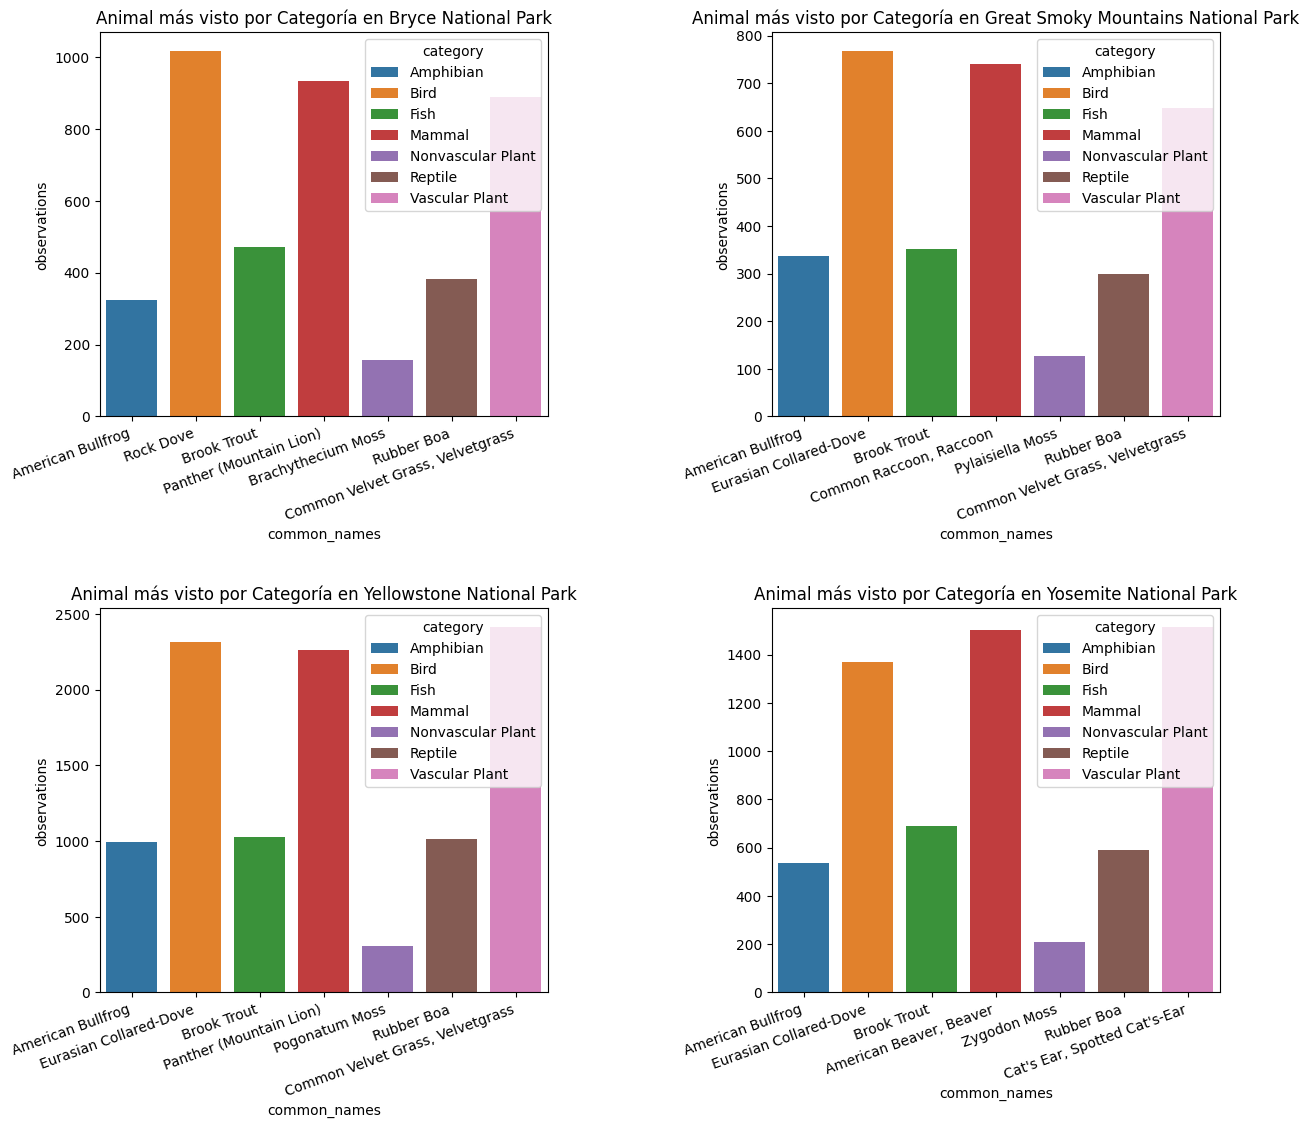

<Figure size 640x480 with 0 Axes>

In [26]:
fig=plt.figure(figsize=(14,12))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.5, hspace=0.5)
ax=fig.add_subplot(2,2,1)
sns.barplot(data=obsxbryce,x='common_names',y='observations',hue='category')
plt.xticks(rotation=20,ha='right')
ax.set(title='Animal más visto por Categoría en Bryce National Park')
ax=fig.add_subplot(2,2,2)
sns.barplot(data=obsxsmoky,x='common_names',y='observations',hue='category')
plt.xticks(rotation=20,ha='right')
ax.set(title='Animal más visto por Categoría en Great Smoky Mountains National Park')
ax=fig.add_subplot(2,2,3)
sns.barplot(data=obsxyellowstone,x='common_names',y='observations',hue='category')
plt.xticks(rotation=20,ha='right')
ax.set(title='Animal más visto por Categoría en Yellowstone National Park')
ax=fig.add_subplot(2,2,4)
sns.barplot(data=obsxyosemite,x='common_names',y='observations',hue='category')
plt.xticks(rotation=20,ha='right')
ax.set(title='Animal más visto por Categoría en Yosemite National Park')

plt.show()
plt.clf()